# Preprocessing EM Data

We can store and process EM in two different file formats. The first is NumPy array data format. We get this file format when we capture EM data from a GNURadio Companion flowgraph through ZMQ sockets. The second file format is the cfile format. We get this file format when we save EM data using File Sink block within the GRC flowgraph. In NumPy file format, we can simply load and handle data as an ordinary NumPy array. However, for cfile format files, we have to use **getData()** function from the **emvince** library that reads the cfile and convert it into a NumPy array. Once converted, we can continue manipulating the data from a cfile just like the data from NumPy file.

In this Jupyter-Notebook, we will explore how to manipulate EM data using the API functions that are coming from two different file formats. 

- We are given two data files.
    1. A NumPy data file - 3.hackrf-data.npy
    2. A cFile data file - 3.hackrf-data.cfile
- First, we will load and plot the data from the two files separately.
- Then we will look at extracting only a segment of data from the files.

### 1. Importing required libraries

In [25]:
import matplotlib.pyplot as plt
import numpy as np
#from scipy import signal
from emvincelib import iq, ml, stat

%matplotlib inline

### 2. Setting the configurations

The sampling rate of the provided data files are both 10MHz. Therefore, we set it first.

In [26]:
iq.sampleRate = 10e6

### 3. How big the files are?

In [27]:
duration_of_npy = iq.getTimeDuration("./data/3.hackrf-data.npy", fileType="npy")

print("Time duration of the numpy file: " + str(duration_of_npy) + " seconds")

duration_of_cfile = iq.getTimeDuration("./data/3.hackrf-data.cfile", fileType="cfile")
                                       
print("Time duration of the cfile file: " + str(duration_of_cfile) + " seconds")

Time duration of the numpy file: 0.01 seconds
Time duration of the cfile file: 0.0527872 seconds


### 4. Loading the entire data into memory

In [28]:
data_npy= np.load("./data/3.hackrf-data.npy", mmap_mode='r')

length = len(data_npy)

print("Number of samples in NumPy data: " + str(length))

data_cfile= iq.getData("./data/3.hackrf-data.cfile")

length = len(data_cfile)

print("Number of samples in cfile data: " + str(length))

Number of samples in NumPy data: 100000
Number of samples in cfile data: 527872


### 5. Plotting data


#### Waveform Plot

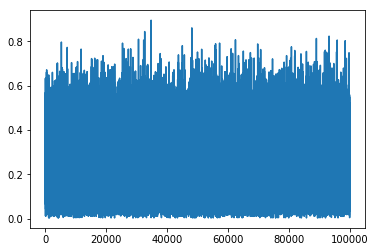

1

In [29]:
iq.plotWaveform(data_npy)

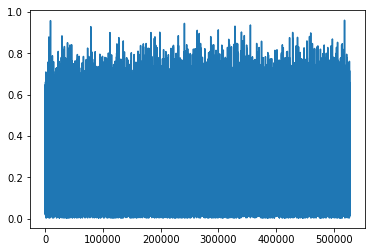

1

In [30]:
iq.plotWaveform(data_cfile)

#### Scatter Plot

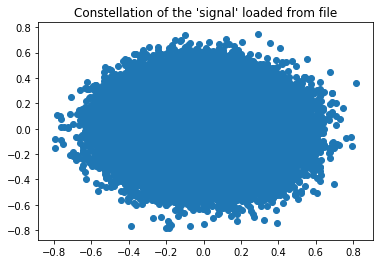

1

In [31]:
iq.plotScatter(data_npy)

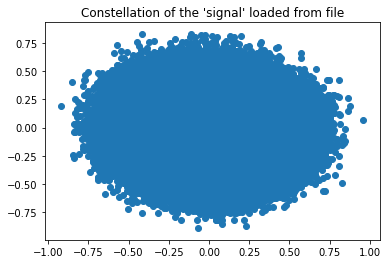

1

In [32]:
iq.plotScatter(data_cfile)

#### FFT Plot

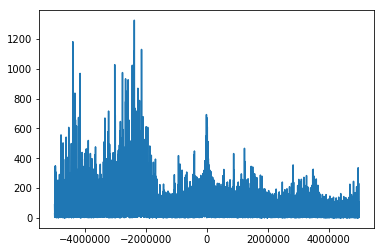

1

In [33]:
iq.plotFFT(data_npy)

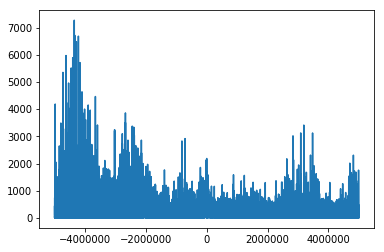

1

In [34]:
iq.plotFFT(data_cfile)

#### PSD Plot

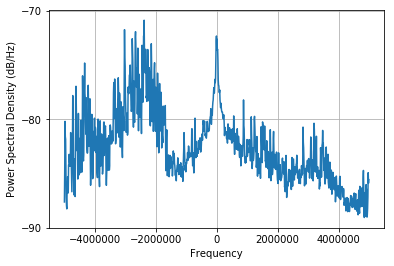

1

In [35]:
iq.plotPSD(data_npy)

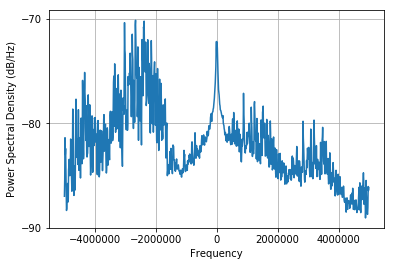

1

In [36]:
iq.plotPSD(data_cfile)

#### Spectrogram Plot

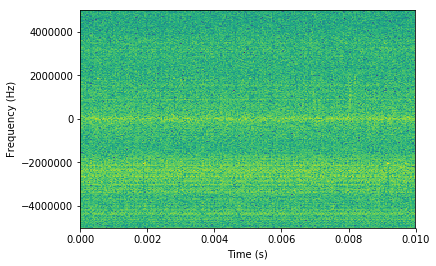

1

In [37]:
iq.plotSpectrogram(data_npy)

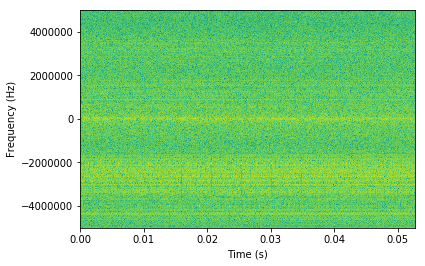

1

In [38]:
iq.plotSpectrogram(data_cfile)

### 6. Extracting Smaller Segments of Data

When the sampling rate is higher and the sampling time period is longer, we end up with large data files. Depending on the data file format, we have to be careful and use different approaches when loading them.

- If the file format is NumPy, then we can load the data with memory mapping as usual (**np.load()** function with **mmap_mode='r'** parameter)
- If the file format is cfile, we can't use **load()** function. We can use **getData()** function but then it loads the whole dataset into memory. Therefore we use **getSegmentData()** function instead.
- Let's see how we can do this.

#### A segment from NumPy file

Let's say we want to extract 5 milliseconds long segment of data starting from the time offset 2 milliseconds from **3.hackrf-data.npy** file.

Sample rate: 10MHz
Time period to skip: 2 milliseconds
Time period to extract: 5 milliseconds

Therefore,
Number of samples to skip = Time period to skip x Sample rate = 2 milliseconds x 10MHz = 0.002 x 10,000,000 = 20,000

Number of samples to extract = Time period to extract x Sample rate = 5 milliseconds x 10MHz = 0.005 x 10,000,000 = 50,000

Number of samples in NumPy data segment: 50000


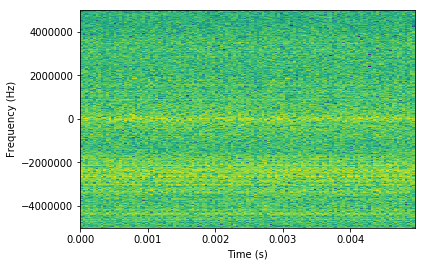

1

In [39]:
data_npy= np.load("./data/3.hackrf-data.npy", mmap_mode='r')

data_segment_npy = data_npy[20000:70000] 

length = len(data_segment_npy)

print("Number of samples in NumPy data segment: " + str(length))

iq.plotSpectrogram(data_segment_npy)

#### A segment from cFile file

Let's say we want to extract 5 milliseconds long segment of data starting from the time offset 2 milliseconds from **3.hackrf-data.cfile** file.

We can directly do that with the **getSegmentData()** function in **emvince** library. It takes three parameters. The first is the cfile name. The second and third are the time offset and time segment size in seconds.

Number of samples in cfile data: 50000


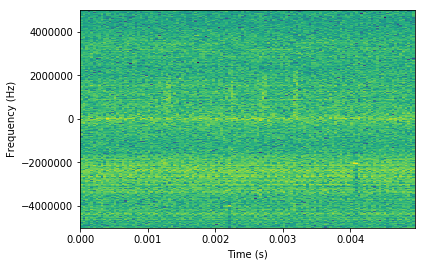

1

In [40]:
data_segment_cfile= iq.getSegmentData("./data/3.hackrf-data.cfile", 0.002, 0.005)

length = len(data_segment_cfile)

print("Number of samples in cfile data: " + str(length))

iq.plotSpectrogram(data_segment_cfile)